In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
plt.rcParams.update({"text.usetex": False,
                     "font.size": 20,
                     "pdf.fonttype": 42,
                     "ps.fonttype": 42})

In [3]:
local_df = pd.read_csv("../measurements/local_long/map.csv")
map_df = pd.read_csv("../measurements/JPEG_manager_history1/map.csv")
cha_df = pd.read_csv("../measurements/JPEG_manager_history1/characteristic.csv")

static_map_df = pd.read_csv("../measurements/jpeg_no_change/map.csv")
static_cha_df = pd.read_csv("../measurements/jpeg_no_change/characteristic.csv")

In [4]:
map_df.head()

,pruning_thresh,quality,technique,bandwidth,mAP_drop,frame_id,feasible,sensitivity,map
0,0.0,100,1,3.497043e+07,40,1,-1,0.5,0.500000
1,0.0,90,1,3.488184e+07,40,2,-1,1.0,0.666667
2,0.0,80,1,3.473458e+07,40,3,-1,1.0,0.666667
3,0.0,70,1,3.452922e+07,40,4,-1,0.8,0.625000
4,0.0,60,1,3.426659e+07,40,5,-1,0.6,0.583333


# Configuration

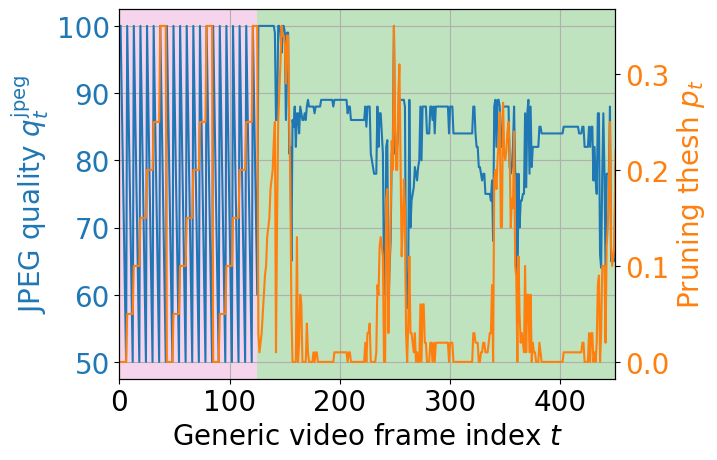

In [5]:
# fig, ax1 = plt.subplots(figsize=(6,4))
fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('Generic video frame index $t$')
ax1.set_ylabel(r'JPEG quality $q^{\text{jpeg}}_t$', color=color)

ax1.tick_params(axis='y', labelcolor=color)

feasibility = map_df["feasible"].to_numpy()
for i in range(len(feasibility)):
    if feasibility[i] == 1:
        ax1.axvspan(i, i+1, facecolor='tab:green', alpha=0.3)
    else:
        ax1.axvspan(i, i+1, facecolor='tab:pink', alpha=0.3)
ax1.plot(map_df["frame_id"].to_numpy(),map_df["quality"].to_numpy(),color=color)
ax1.grid()
ax2 = ax1.twinx() 
color = 'tab:orange'
ax2.set_ylabel('Pruning thesh $p_t$', color=color)  # we already handled the x-label with ax1
ax2.plot(map_df["frame_id"].to_numpy(),map_df["pruning_thresh"].to_numpy(), color=color)
ax2.tick_params(axis='y', labelcolor=color)

# plt.grid()
ax1.autoscale(axis="x",tight=True)
plt.savefig("./images/jpeg_config.pdf", bbox_inches='tight')
# ax3 = ax2.twinx() 
# color = 'tab:purple'
# ax3.set_ylabel('Bandwidth [Mbps]', color=color)  # we already handled the x-label with ax1
# ax3.plot(map_df["frame_id"].to_numpy(),map_df["bandwidth"].to_numpy()/1e6, color=color)
# ax3.tick_params(axis='y', labelcolor=color)

# mAP drop

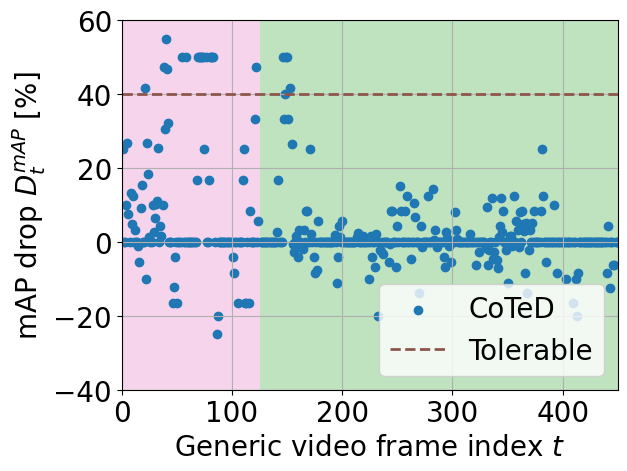

In [6]:

plt.figure()

feasibility = map_df["feasible"].to_numpy()
for i in range(len(feasibility)):
    if feasibility[i] == 1:
        plt.axvspan(i, i+1, facecolor='tab:green', alpha=0.3)
    else:
        plt.axvspan(i, i+1, facecolor='tab:pink', alpha=0.3)


# plt.scatter(static_map_df["frame_id"].to_numpy(),(local_df["map"].to_numpy() - static_map_df["map"].to_numpy())*100,label="Static")
plt.scatter(map_df["frame_id"].to_numpy(),(local_df["map"].to_numpy() - map_df["map"].to_numpy())*100,label="CoTeD")
plt.axhline(y=40, color='tab:brown', linestyle='--', linewidth=2,label="Tolerable")



plt.ylim([-40,60])
plt.legend(loc="lower right")
plt.grid()
plt.xlabel("Generic video frame index $t$")
plt.ylabel("mAP drop $D^{mAP}_t$ [%]")
plt.autoscale(axis="x",tight=True)
plt.savefig("./images/jpeg_map_drop.pdf", bbox_inches='tight')

In [7]:
# temp  = local_df["map"].to_numpy() - static_map_df["map"].to_numpy()

# temp.std()

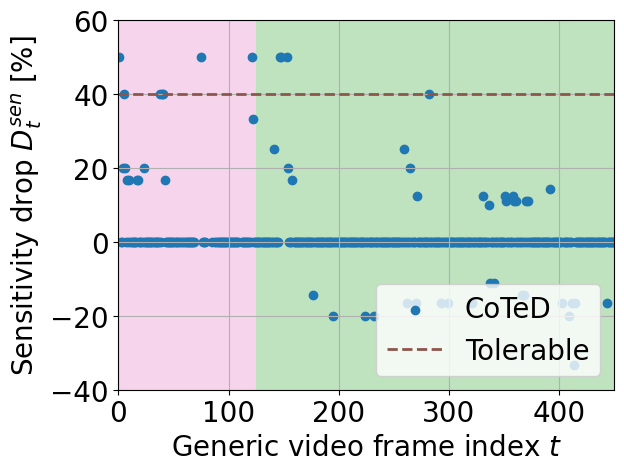

In [8]:
plt.figure()

feasibility = map_df["feasible"].to_numpy()
for i in range(len(feasibility)):
    if feasibility[i] == 1:
        plt.axvspan(i, i+1, facecolor='tab:green', alpha=0.3)
    else:
        plt.axvspan(i, i+1, facecolor='tab:pink', alpha=0.3)


# plt.scatter(static_map_df["frame_id"].to_numpy(),(local_df["sensitivity"].to_numpy() - static_map_df["sensitivity"].to_numpy())*100,label="Static")
plt.scatter(map_df["frame_id"].to_numpy(),(local_df["sensitivity"].to_numpy() - map_df["sensitivity"].to_numpy())*100,label="CoTeD")
plt.axhline(y=40, color='tab:brown', linestyle='--', linewidth=2,label="Tolerable")



plt.ylim([-40,60])
plt.legend(loc="lower right")
plt.grid()
plt.xlabel("Generic video frame index $t$")
plt.ylabel("Sensitivity drop $D_t^{sen}$ [%]")
plt.autoscale(axis="x",tight=True)
plt.savefig("./images/jpeg_sensitivity_drop.pdf", bbox_inches='tight')

In [9]:
# temp  = local_df["sensitivity"].to_numpy() - map_df["sensitivity"].to_numpy()

# temp.std()

# Compression ratio

In [10]:
raw_tensor_size = 128*26*26*4 # bytes
cha_df["ratio"] = raw_tensor_size/cha_df["datasize_real"]
static_cha_df["ratio"] = raw_tensor_size/static_cha_df["datasize_real"]

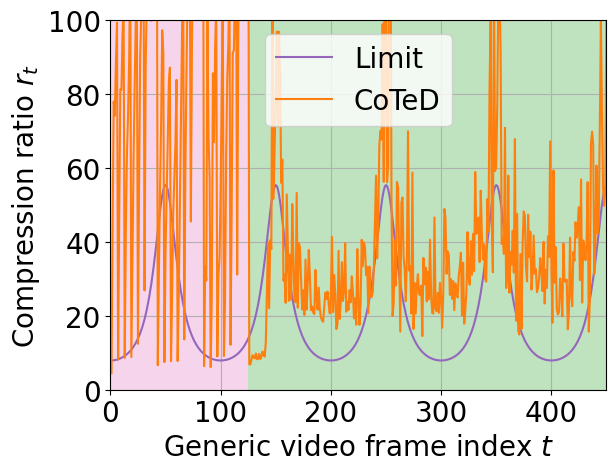

In [11]:
plt.figure()

feasibility = map_df["feasible"].to_numpy()
for i in range(len(feasibility)):
    if feasibility[i] == 1:
        plt.axvspan(i, i+1, facecolor='tab:green', alpha=0.3)
    else:
        plt.axvspan(i, i+1, facecolor='tab:pink', alpha=0.3)

plt.plot(cha_df["frame_id"].to_numpy(),raw_tensor_size*8/(cha_df["bandwidth"]*0.01),color="tab:purple",label="Limit")
# plt.plot(cha_df["frame_id"].to_numpy(),cha_df["target_cmp"],color="tab:brown",label="Target(est)")
plt.plot(cha_df["frame_id"].to_numpy(),cha_df["ratio"],color="tab:orange",label="CoTeD")
# plt.plot(static_cha_df["frame_id"].to_numpy(),static_cha_df["ratio"],color="tab:blue",label="Static")

plt.ylim([0,100])
plt.legend()
plt.grid()
plt.xlabel("Generic video frame index $t$")
plt.ylabel("Compression ratio $r_t$")
plt.autoscale(axis="x",tight=True)
plt.savefig("./images/jpeg_cmp_ratio.pdf", bbox_inches='tight')

# Bandwidth

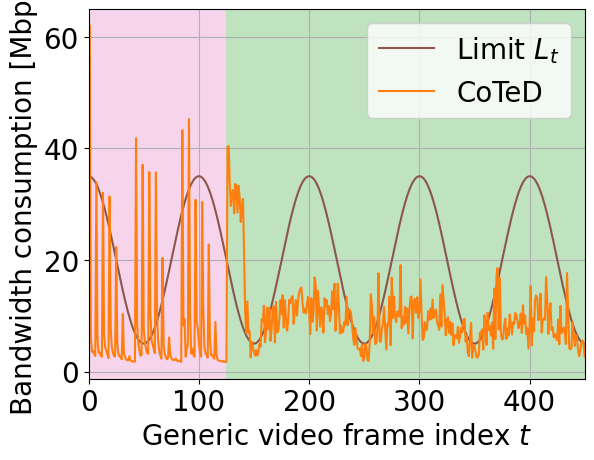

In [12]:
plt.figure()


feasibility = map_df["feasible"].to_numpy()
for i in range(len(feasibility)):
    if feasibility[i] == 1:
        plt.axvspan(i, i+1, facecolor='tab:green', alpha=0.3)
    else:
        plt.axvspan(i, i+1, facecolor='tab:pink', alpha=0.3)

plt.plot(cha_df["frame_id"].to_numpy(),cha_df["bandwidth"]/1e6,color="tab:brown",label="Limit $L_t$")
plt.plot(cha_df["frame_id"].to_numpy(),(cha_df["datasize_real"]*8)/(1e6*0.01),color="tab:orange",label="CoTeD")
# plt.plot(static_cha_df["frame_id"].to_numpy(),(static_cha_df["datasize_real"]*8)/(1e6*0.01),color="tab:blue",label="Static")

plt.legend()
plt.grid()
plt.xlabel("Generic video frame index $t$")
plt.ylabel("Bandwidth consumption [Mbps]")
plt.autoscale(axis="x",tight=True)
plt.savefig("./images/jpeg_bandwidth.pdf", bbox_inches='tight')

# SNR

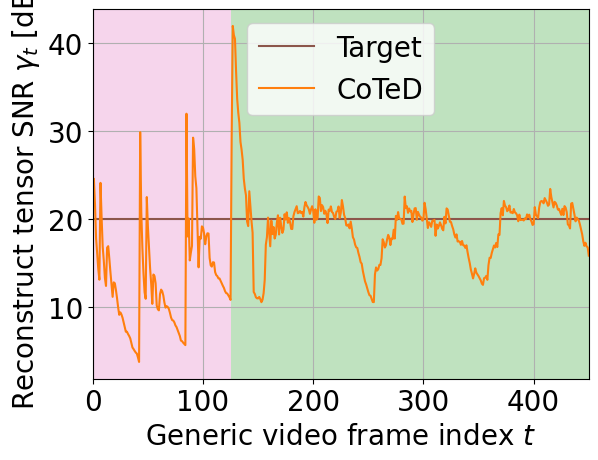

In [13]:
plt.figure()


feasibility = map_df["feasible"].to_numpy()
for i in range(len(feasibility)):
    if feasibility[i] == 1:
        plt.axvspan(i, i+1, facecolor='tab:green', alpha=0.3)
    else:
        plt.axvspan(i, i+1, facecolor='tab:pink', alpha=0.3)

plt.plot(cha_df["frame_id"].to_numpy(),cha_df["target_snr"],color="tab:brown",label="Target")
plt.plot(cha_df["frame_id"].to_numpy(),cha_df["reconstruct_snr"],color="tab:orange",label="CoTeD")
# plt.plot(static_cha_df["frame_id"].to_numpy(),static_cha_df["reconstruct_snr"],color="tab:blue",label="Static")

plt.legend()
plt.grid()
plt.xlabel("Generic video frame index $t$")
plt.ylabel("Reconstruct tensor SNR $\gamma_t$ [dB]")
plt.autoscale(axis="x",tight=True)
plt.savefig("./images/jpeg_snr.pdf", bbox_inches='tight')